# 전국 신규 민간 아파트 분양가격 동향
- 2013년부터 최근까지 부동산 가격 변동 추세를 알아봅니다.
- 전혀 다른 형태의 두 데이터를 가져오 ㅏ정제하고 병합하는 과정을 다루는 방법 학습합니다
- 전처리한 결과에 대해 수치형, 범주형 데이터를 이해하고 다양한 그래프로 시각화합니다

## Config

In [1]:
import pandas as pd

---

## Preprocessing

### Default

#### load

In [2]:
df_first = pd.read_csv('./condominium/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_last = pd.read_csv('./condominium/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')

####  check

In [3]:
df_first.shape

(17, 22)

In [4]:
df_last.shape

(4335, 5)

In [5]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [6]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


#### Missing Data

In [7]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

##### 데이터타입 변경
- 분양가격이 object(문자)타입이라 계산이 불가합니다.
- 계산을 수행하기위해서는 수치데이터로 변경하여야 하는데, 결측치가 포함되어있으면 변환이 의도한대로 되지않을 수 있습니다.
- to_numeric을 사용할 경우, 데이터타입 변경시 별도의 예외처리가 가능합니다.
    - __errors__ : [
        'coerce' : 사전적 의미는 '강압'이고, type이 float인 NaN값으로 변환
    ]


In [8]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last['분양가격'].head()

0    5841.0
1    5652.0
2    5882.0
3    5721.0
4    5879.0
Name: 분양가격, dtype: float64

In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


######  넘파이의 NaN값은 float

In [10]:
type(pd.np.nan)

<ipython-input-10-e71c757bba12>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  type(pd.np.nan)


float

### 평당 가격 구하기
- 현재 사용중인 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
- 분양가격을 평당기준으로 보기위해 3.3을 곱해 '평당분양가격'컬럼을 추가합니다.

In [11]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3 # 평당분양가격 컬럼 추가 (평당분양가격 = 분양가격 * 3.3)
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [12]:
df_last.info() # 평당분양가격 데이터 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


### 규모구분을 전용면적 컬럼으로 변경
- 규모구분 컬럼은 전용면적에 대한 내용이 있습니다.
- 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 __간결하게 저장__합니다.

- str의 replace기능을 사용해 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡"로 변경

In [13]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', "") # "전용면적" -> ""
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', "~") # "초과" -> "~"
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', "") # "이하" -> ""
df_last['전용면적'] = df_last['전용면적'].str.replace('" "', "") # " " -> ""
df_last['전용면적']

0               전체
1              60㎡
2         60㎡~ 85㎡
3        85㎡~ 102㎡
4            102㎡~
           ...    
4330            전체
4331           60㎡
4332      60㎡~ 85㎡
4333     85㎡~ 102㎡
4334         102㎡~
Name: 전용면적, Length: 4335, dtype: object

### 불필요 컬럼 삭제

In [14]:
df_last = df_last.drop(['규모구분', '분양가격(㎡)'], axis=1)
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~ 85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~ 102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


### 데이터 집계 with groupby

#### 지역별 평당분양 평균가

In [15]:
df_last.groupby(by=['지역명'])['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

#### 전용면적별 평당분양 평균가

In [16]:
df_last.groupby(by=['전용면적'])['평당분양가격'].mean()

전용면적
 102㎡~        11517.705634
 60㎡          10375.137421
 60㎡~ 85㎡     10271.040071
 85㎡~ 102㎡    11097.599573
전체            10276.086207
Name: 평당분양가격, dtype: float64

#### 전용면적, 지역명별 평당분양 평균가

In [17]:
df_last.groupby(by=['전용면적', '지역명'])['평당분양가격'].mean()

전용면적    지역명
 102㎡~  강원      8311.380000
        경기     14771.790000
        경남     10358.363265
        경북      9157.302000
        광주     11041.532432
                   ...     
전체      전남      7283.562000
        전북      7292.604000
        제주     10784.994000
        충남      7815.324000
        충북      7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [18]:
df_last.groupby(by=['전용면적', '지역명'])['평당분양가격'].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~ 85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~ 102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


#### 연도, 지역별 평당분양가격

In [19]:
g = df_last.groupby(by=['연도', '지역명'])['평당분양가격'].mean().unstack().transpose().round()
g

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.0,7163.0,7274.0,8219.0,8934.0
경기,11061.0,11685.0,12305.0,14258.0,15666.0
경남,8459.0,8497.0,8787.0,9328.0,10698.0
경북,7464.0,7753.0,8281.0,8681.0,9050.0
광주,7917.0,9191.0,9614.0,9527.0,12112.0
대구,9019.0,10282.0,12207.0,12139.0,14082.0
대전,8191.0,8911.0,9957.0,10234.0,12619.0
부산,10377.0,10744.0,11561.0,12890.0,13538.0
서울,20316.0,21753.0,21831.0,23202.0,28287.0


### 데이터 집계 with pivot_table
- pivot_table()함수는 구성속성중 aggfunc의 default가 mean
    - 대상 values 컬럼이 숫자면 mean
    - 대상 values 컬럼이 문자면 count

#### 지역별 평당분양 평균가

In [20]:
pd.pivot_table(df_last, index=['지역명'], values=['평당분양가격'], aggfunc='mean').round()

,평당분양가격
지역명,
강원,7891.0
경기,13357.0
경남,9269.0
경북,8377.0
광주,9952.0
대구,11981.0
대전,10253.0
부산,12087.0
서울,23600.0


#### 전용면적별 평당분양 평균가

In [21]:
pd.pivot_table(df_last, index=['전용면적'], values=['평당분양가격'], aggfunc='mean').round()

,평당분양가격
전용면적,
102㎡~,11518.0
60㎡,10375.0
60㎡~ 85㎡,10271.0
85㎡~ 102㎡,11098.0
전체,10276.0


#### 전용면적, 지역명별 평당분양 평균가

In [22]:
pd.pivot_table(df_last, index=['전용면적', '지역명'], values=['평당분양가격'], aggfunc='mean').round()

평당분양가격
전용면적   지역명         
 102㎡~ 강원    8311.0
       경기   14772.0
       경남   10358.0
       경북    9157.0
       광주   11042.0
...             ...
전체     전남    7284.0
       전북    7293.0
       제주   10785.0
       충남    7815.0
       충북    7219.0

[85 rows x 1 columns]

#### 연도, 지역별 평당분양가격

In [23]:
pd.pivot_table(df_last, index=['연도', '지역명'], values=['평당분양가격'], aggfunc='mean').round()

평당분양가격
연도   지역명         
2015 강원    7188.0
     경기   11061.0
     경남    8459.0
     경북    7464.0
     광주    7917.0
...           ...
2019 전남    8219.0
     전북    8532.0
     제주   11828.0
     충남    8749.0
     충북    7971.0

[85 rows x 1 columns]

In [24]:
pd.pivot_table(df_last, index=['연도', '지역명'], values=['평당분양가격'], aggfunc='mean').unstack().transpose().round()

연도             2015     2016     2017     2018     2019
       지역명                                             
평당분양가격 강원    7188.0   7163.0   7274.0   8219.0   8934.0
       경기   11061.0  11685.0  12305.0  14258.0  15666.0
       경남    8459.0   8497.0   8787.0   9328.0  10698.0
       경북    7464.0   7753.0   8281.0   8681.0   9050.0
       광주    7917.0   9191.0   9614.0   9527.0  12112.0
       대구    9019.0  10282.0  12207.0  12139.0  14082.0
       대전    8191.0   8911.0   9957.0  10234.0  12619.0
       부산   10377.0  10744.0  11561.0  12890.0  13538.0
       서울   20316.0  21753.0  21831.0  23202.0  28287.0
       세종    8765.0   8858.0   9133.0  10340.0  11299.0
       울산    9368.0   9583.0  10667.0  10241.0  10216.0
       인천   10976.0  11099.0  11641.0  11882.0  13250.0
       전남    6799.0   6937.0   7373.0   7930.0   8219.0
       전북    7110.0   6907.0   7399.0   8175.0   8532.0
       제주    7951.0   9567.0  12567.0  11936.0  11828.0
       충남    7690.0   7958.0   8198.0   8202.0   8749.0
       충북    6829.0   7133.0   7473.0   8149.0   7971.0

## Visualization

### Plot

---

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

---

#### Line Chart

<AxesSubplot:xlabel='지역명'>

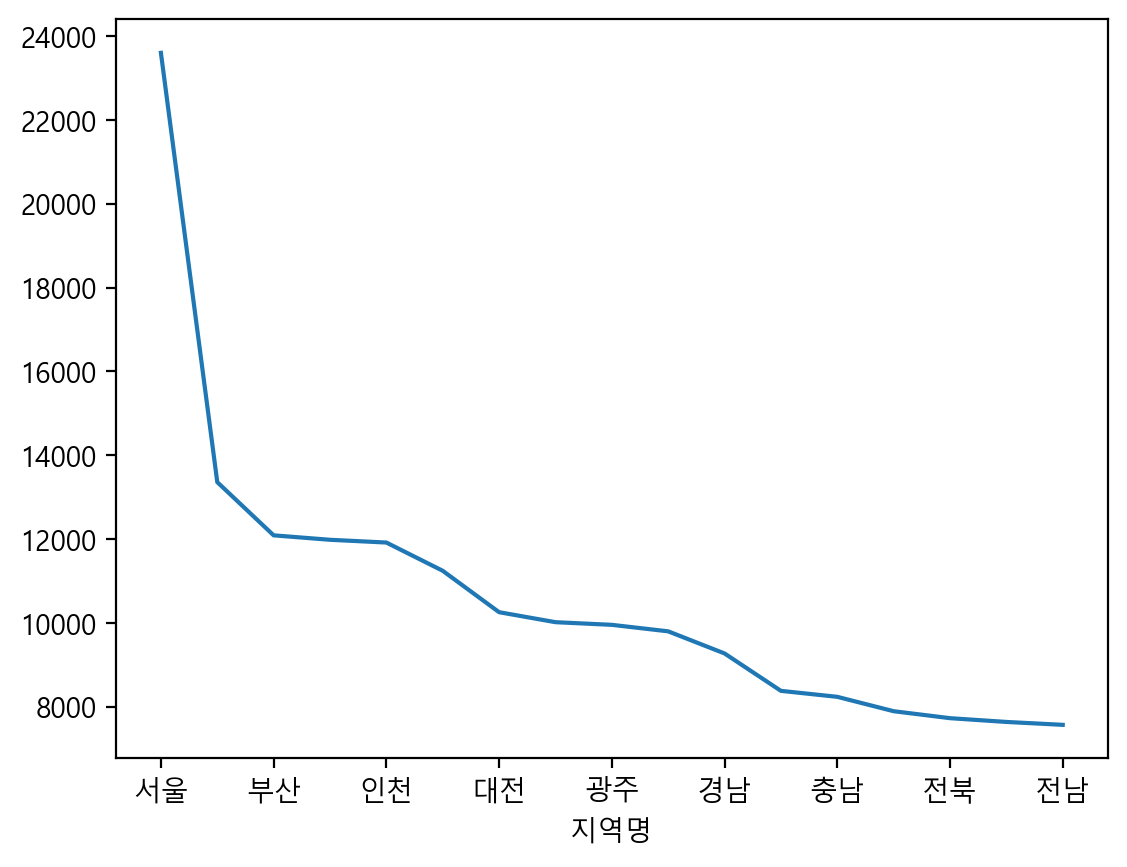

In [26]:
g = df_last.groupby(['지역명'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot() # 기본값이 line

#### Bar Chart

<AxesSubplot:xlabel='지역명'>

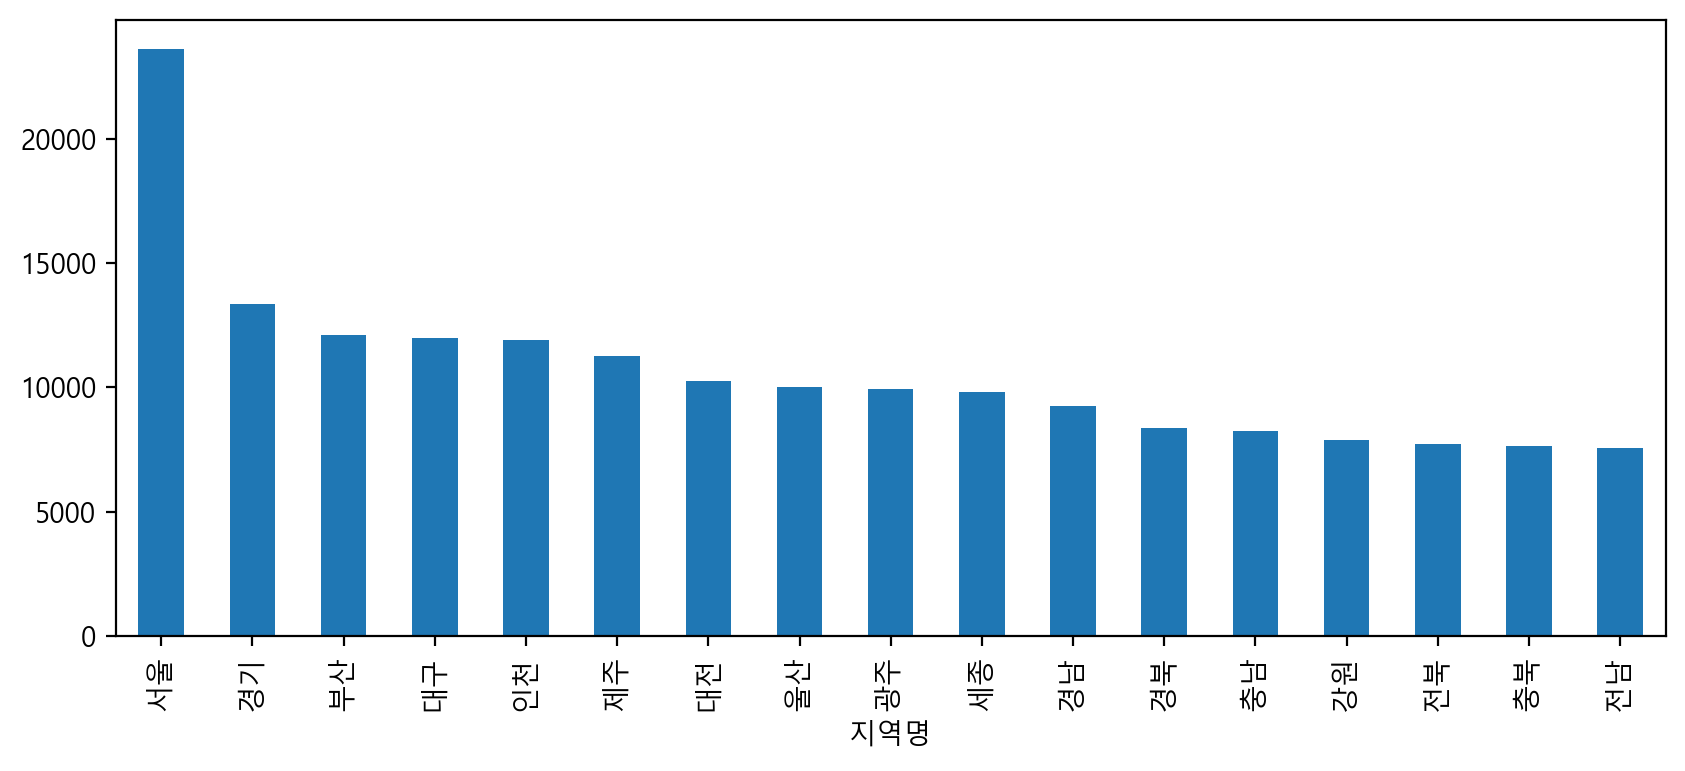

In [27]:
g.plot.bar(figsize=(10, 4))

---
> #### Box-and-Whisker plot | Diagram
>> 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 5가지 통계요약수치를 그립니다.
>>5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯가지 수치를 의미
   >> 1. 최대값
   >> 1. 제 3사분위수
   >> 1. 제 2사분위수(=중앙값)
   >> 1. 제 1사분위수
   >> 1. 최소값
   --- 

In [28]:
df_last.pivot_table(index='월', columns='연도', values='평당분양가격')

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


<AxesSubplot:>

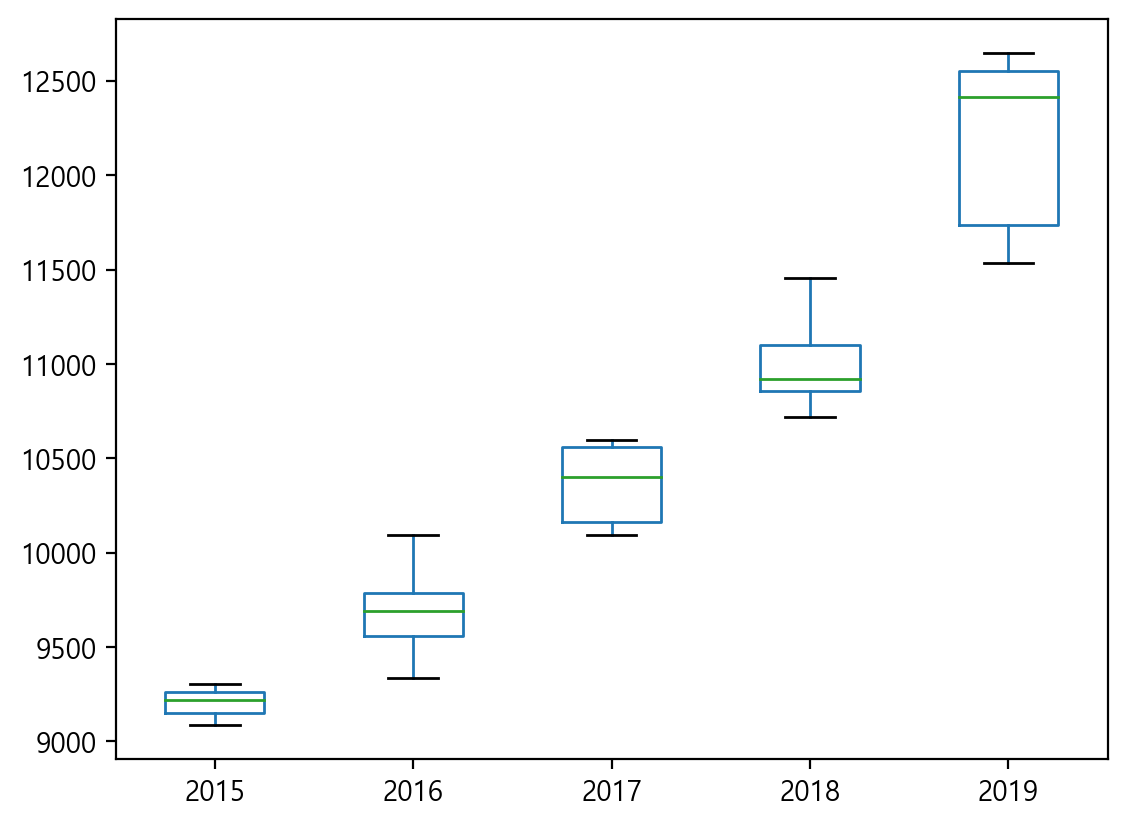

In [29]:
df_last.pivot_table(index='월', columns='연도', values='평당분양가격').plot.box()

<AxesSubplot:>

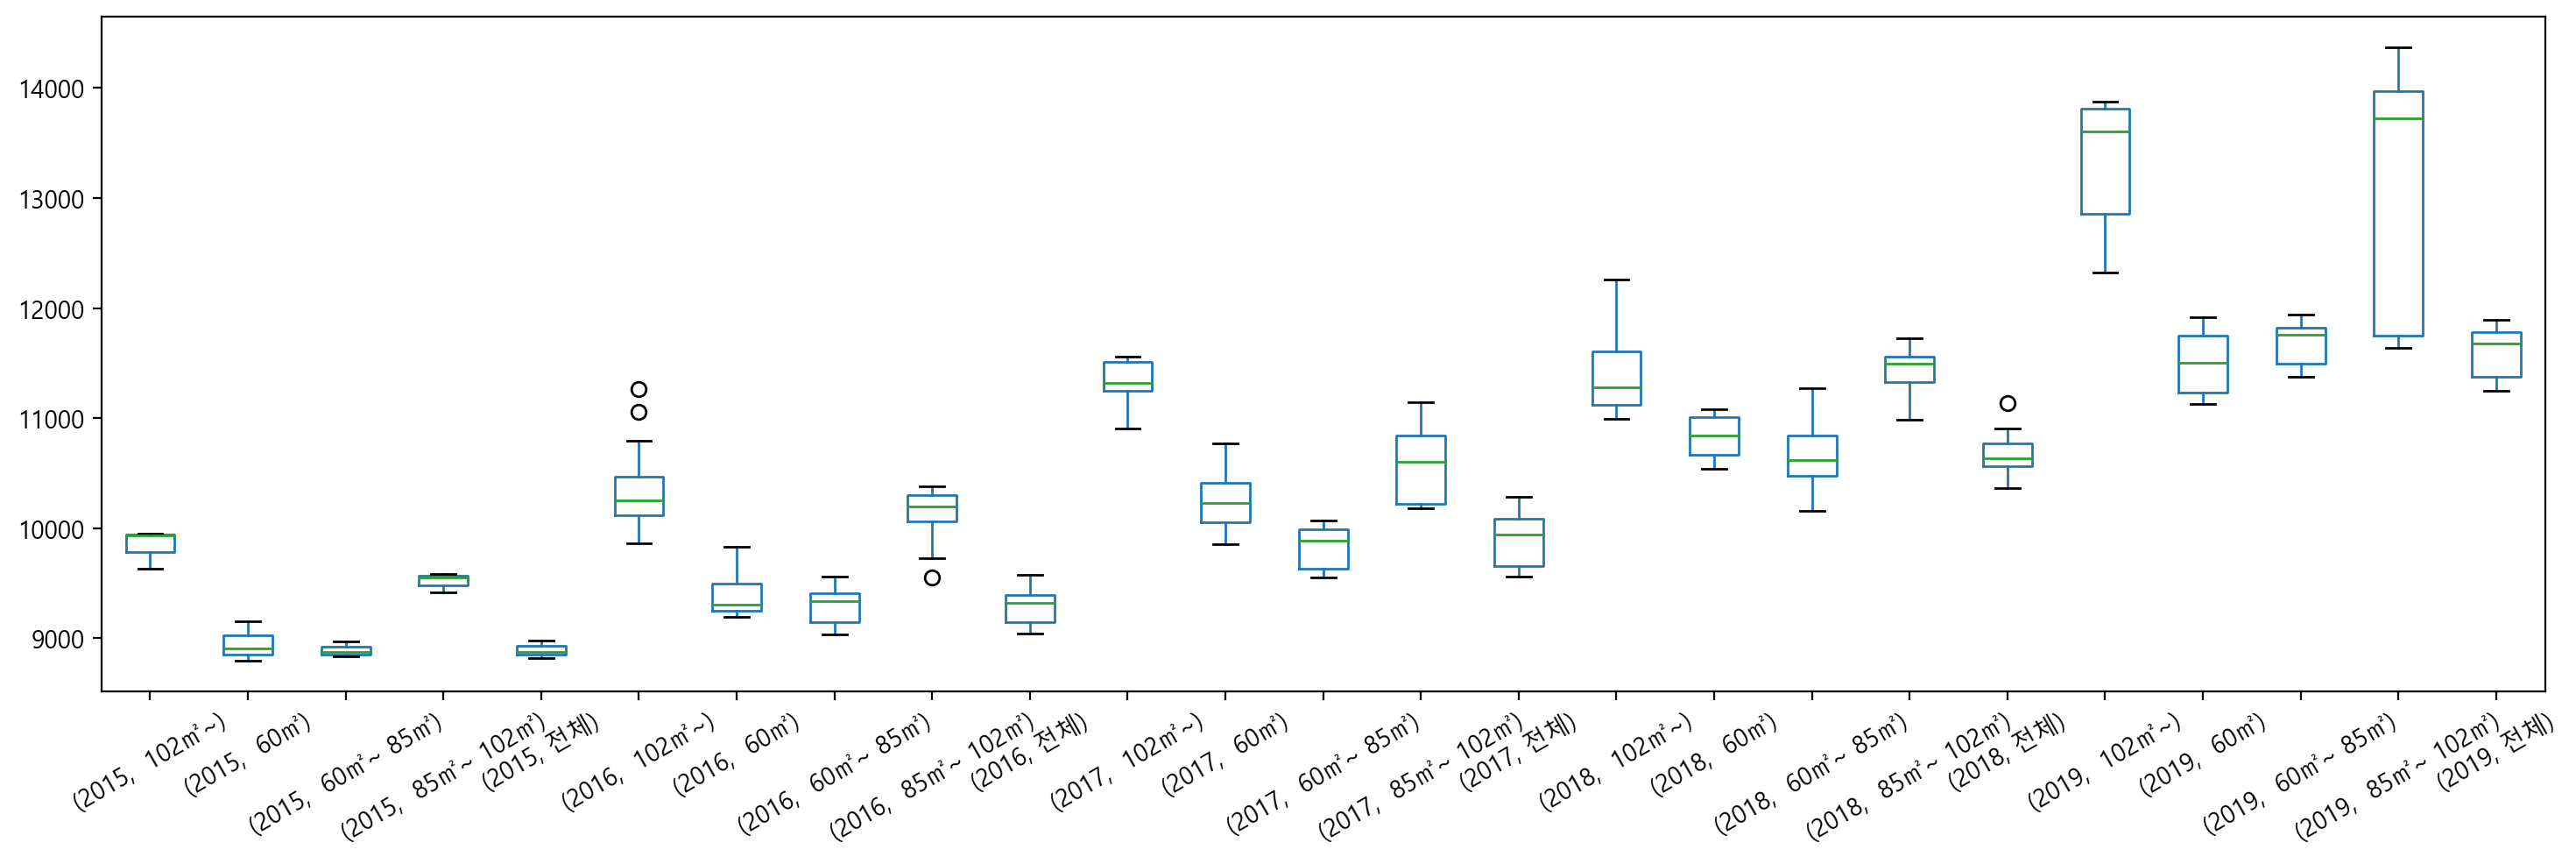

In [30]:
p = df_last.pivot_table(index='월', columns=['연도', '전용면적'], values='평당분양가격')
p.plot.box(figsize=(18, 5), rot=30) # rot : x라벨 기울임 정도

### Seaborn

---

In [31]:
import seaborn as sns

---

#### Line Chart

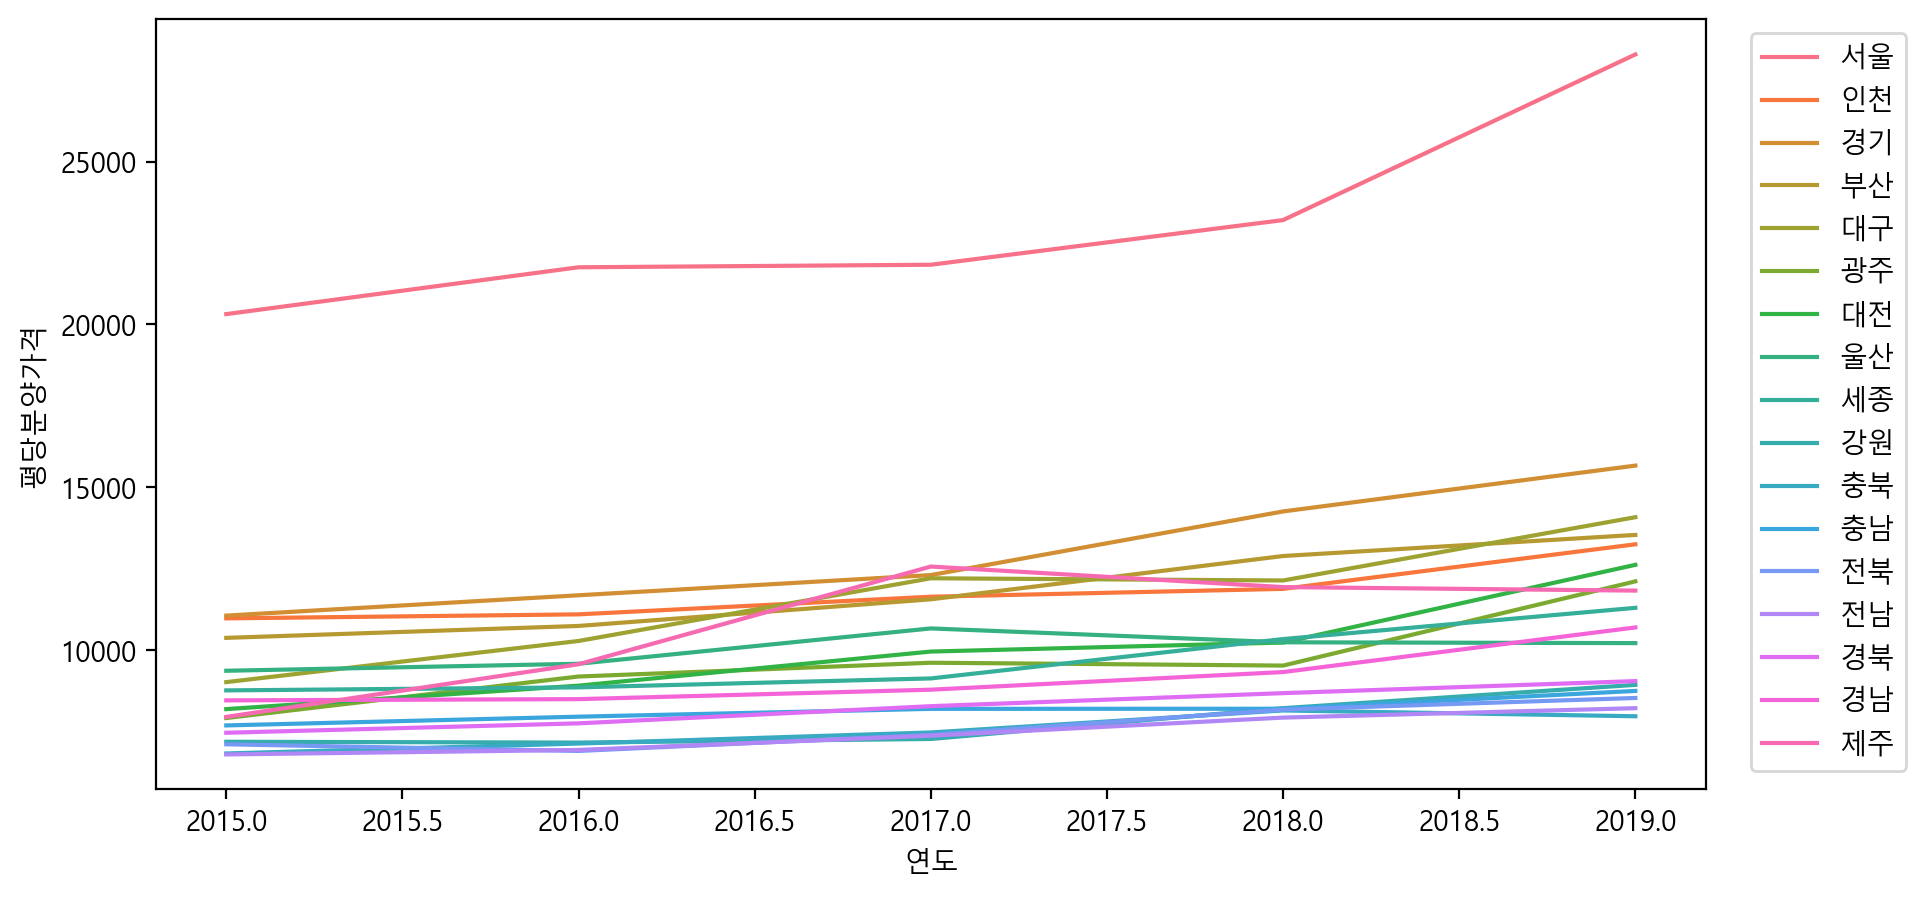

In [32]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

#### Bar Chart

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

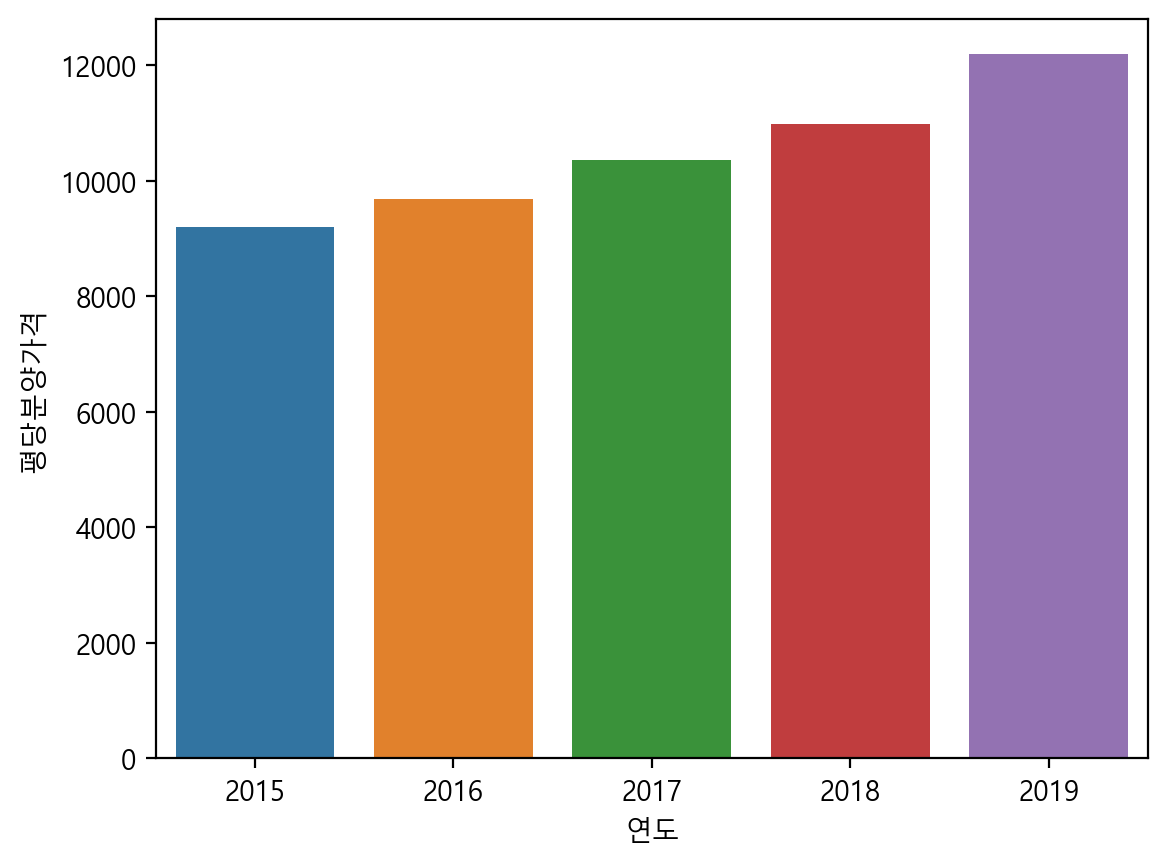

In [33]:
sns.barplot(data=df_last, x='연도', y='평당분양가격', ci=None)

#### Cat Chart

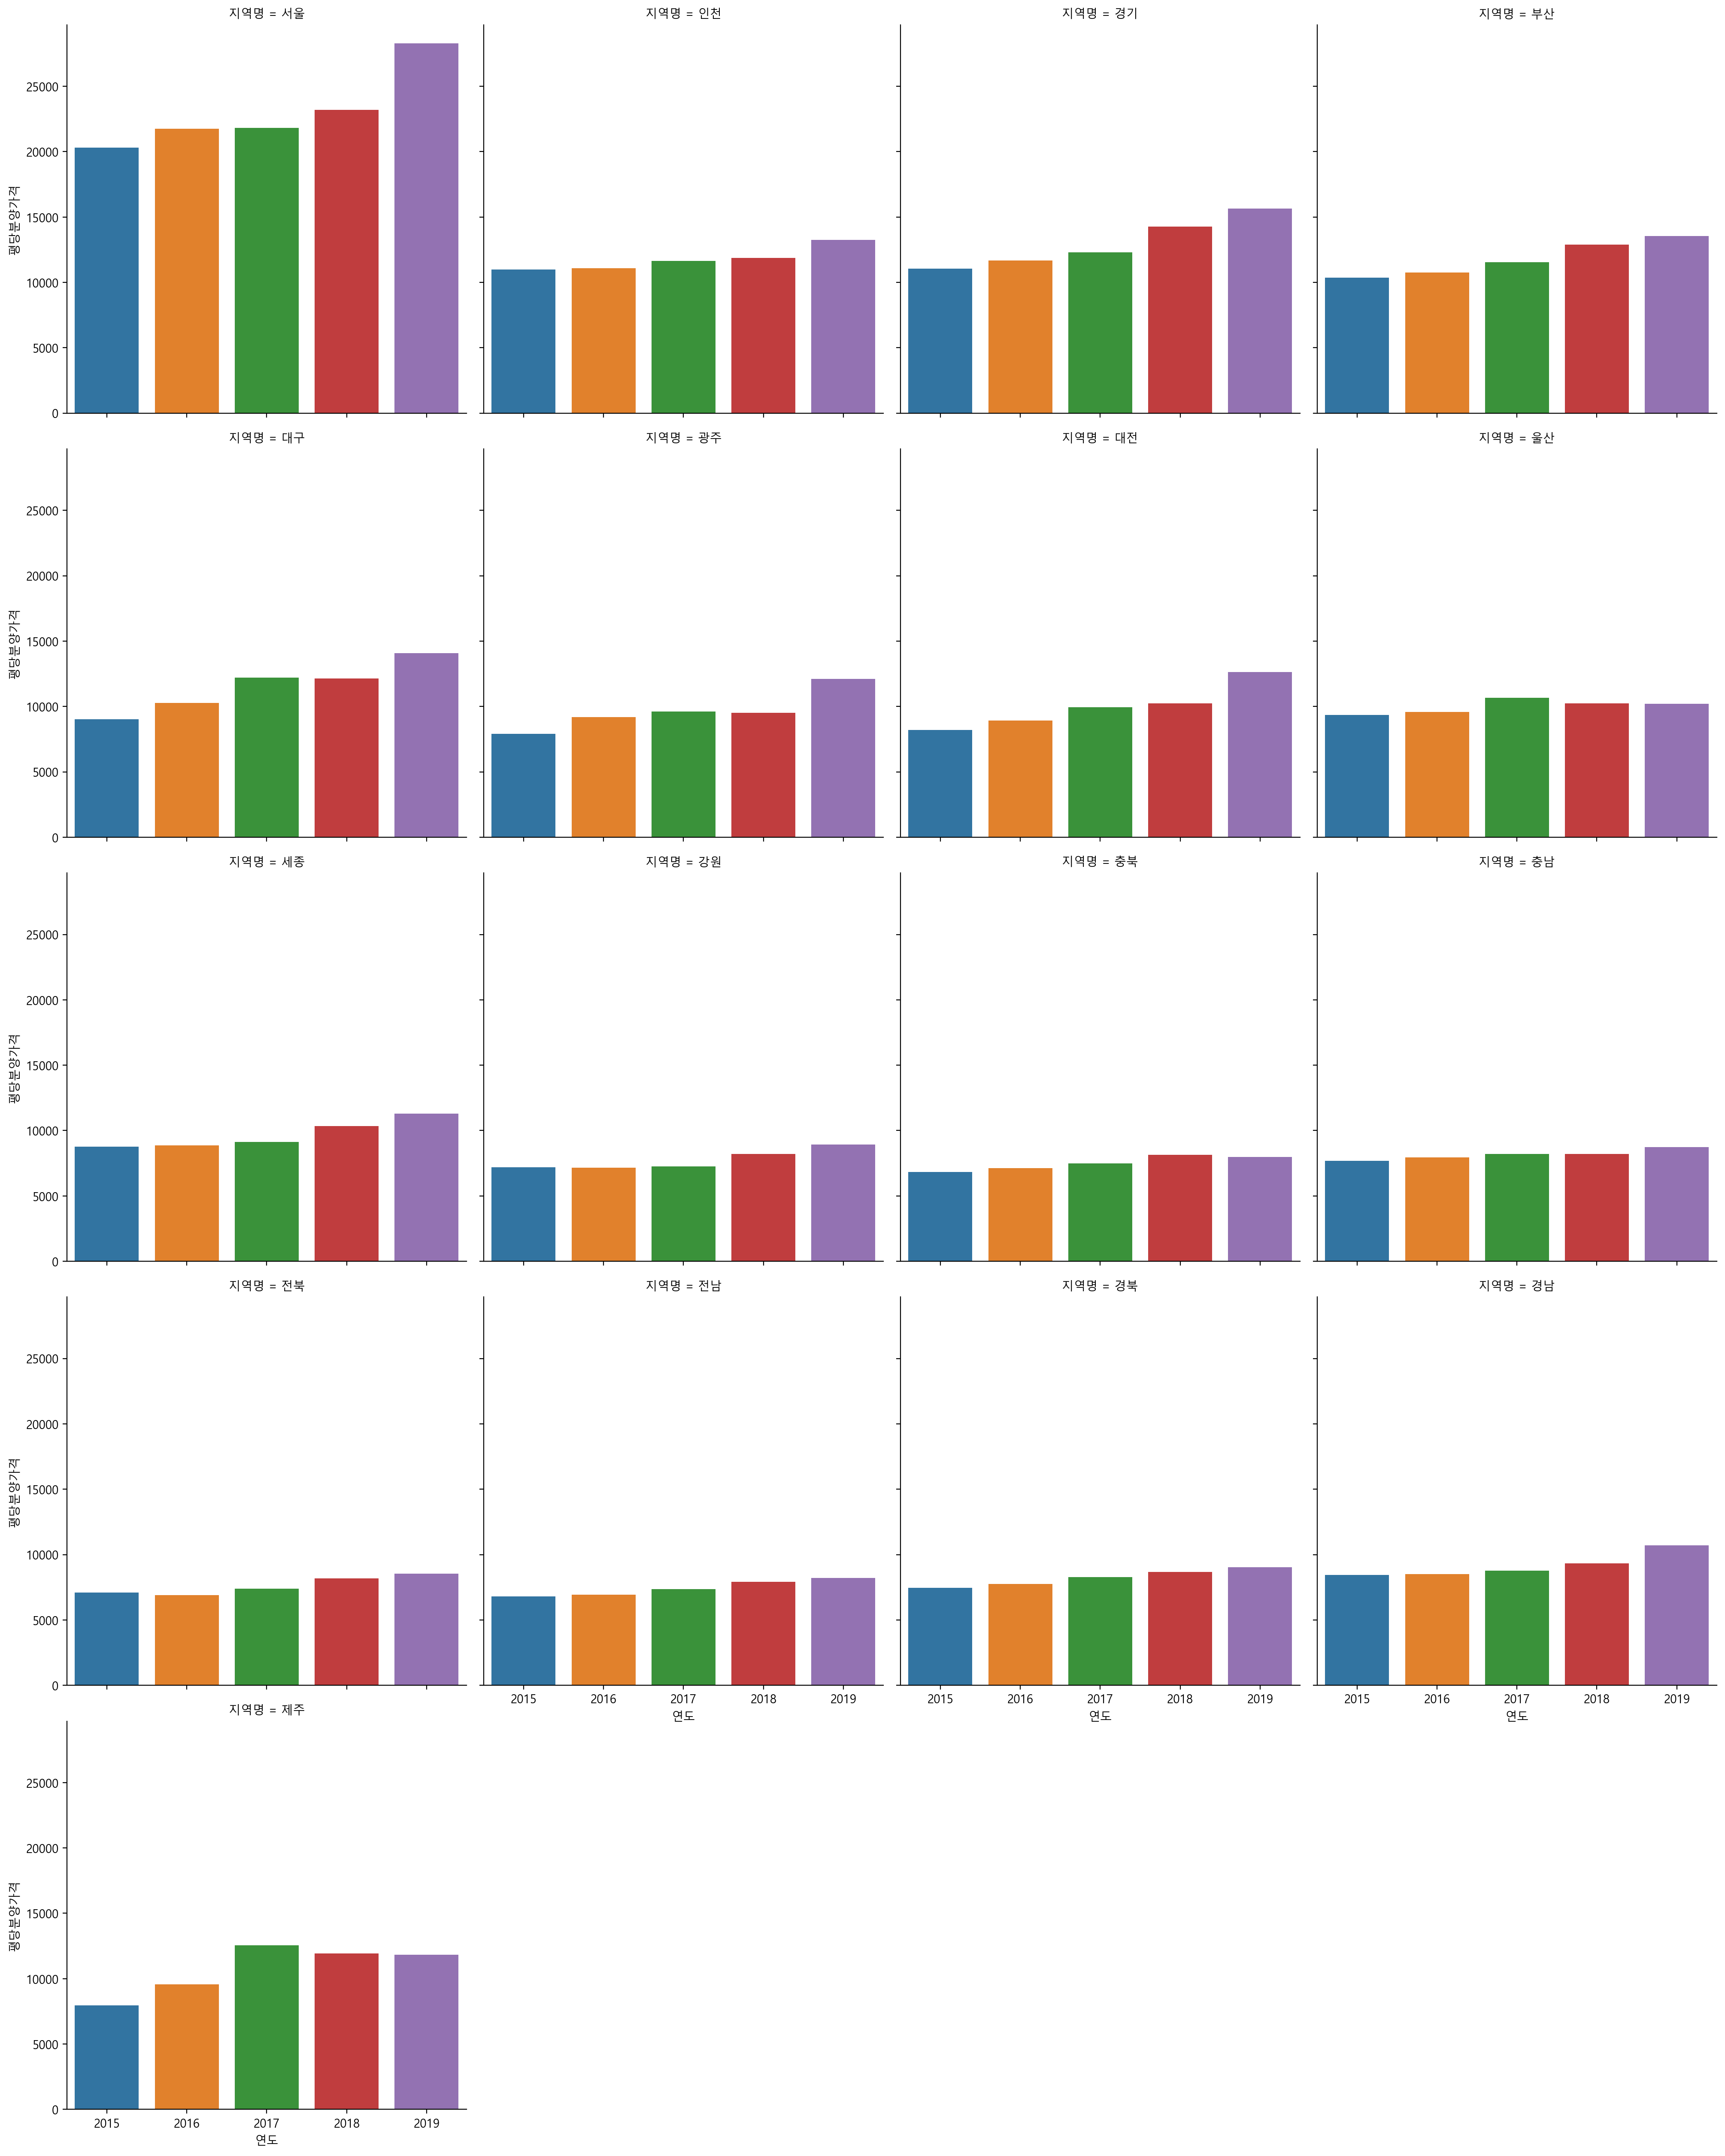

In [34]:
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4, ci=None)

#### Rel Chart

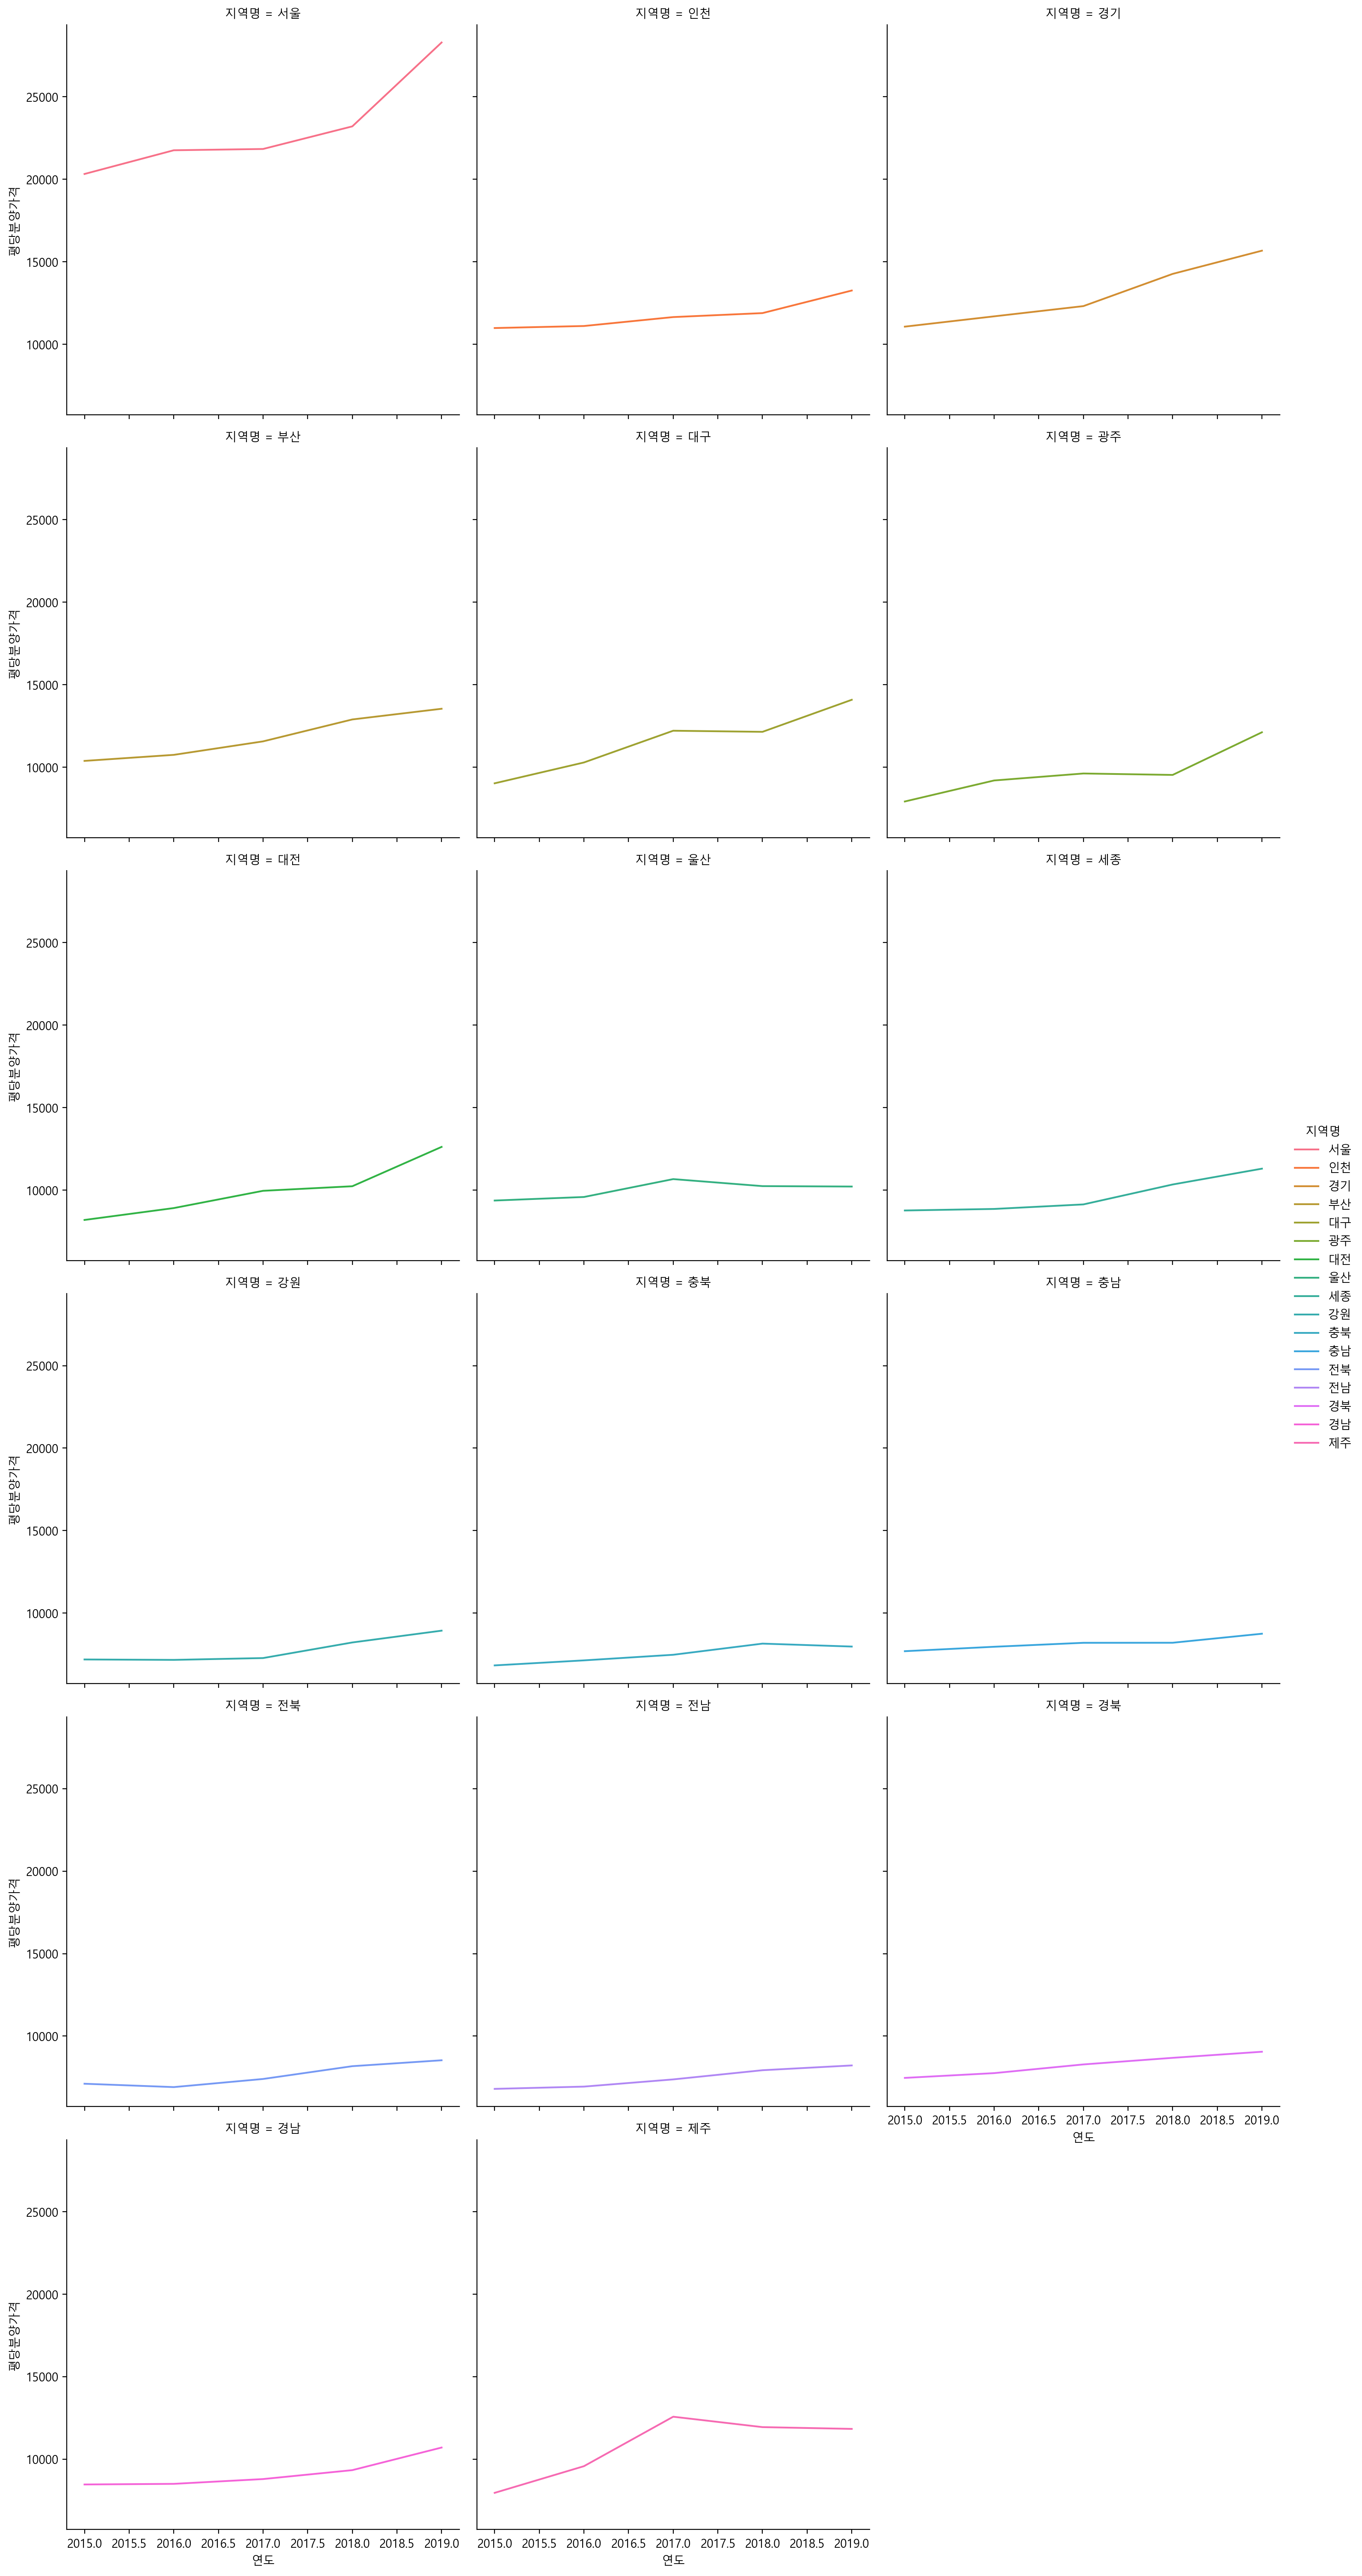

In [35]:
sns.relplot(data=df_last, x='연도', y='평당분양가격', hue='지역명', kind='line', col='지역명', col_wrap=3, ci=None)

#### Cat Chart
- searborn에서 제공되는 boxplot에서 matplot에서 제공되는 boxplot 값들과 이상치에대한 값들이 추가로 표시됩니다.
- 최소값보다 사분위수 범위 값(3사분위값-1사분위값)에 해당하는 값을 초과하는 값

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

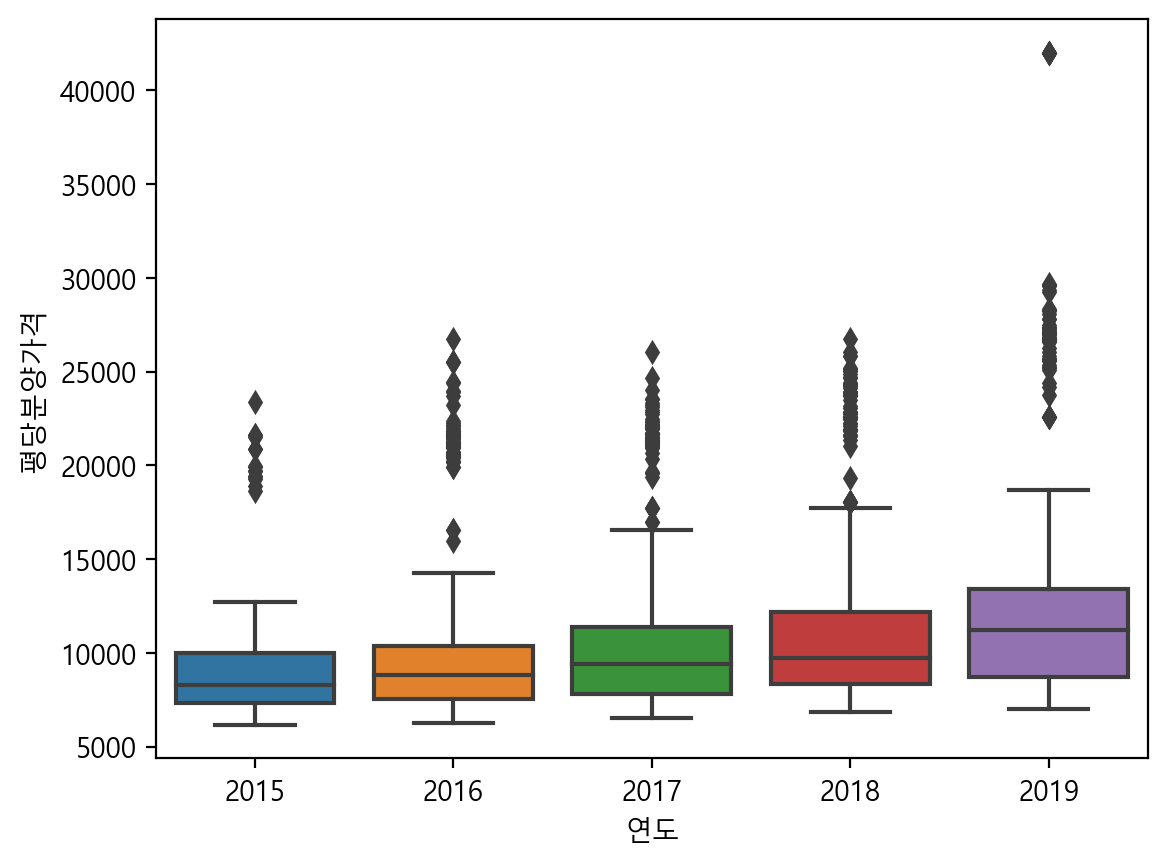

In [36]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')

#### Violin Chart
- boxplot에 데이터에 대한 분포량까지 표시하는 내용이 포함된 차트이고, 바이올린처럼 생겨서 이름이 바이올린 플랏입니다.

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

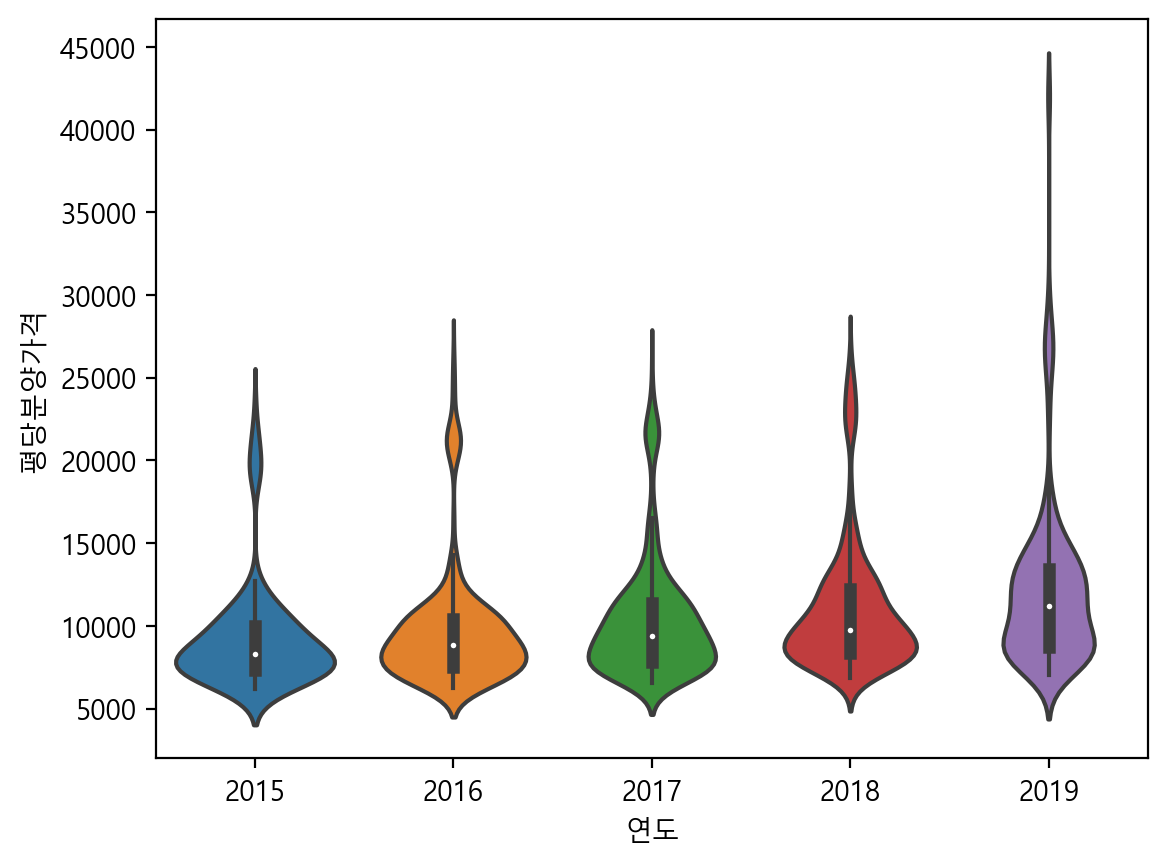

In [37]:
sns.violinplot(data=df_last, x='연도', y='평당분양가격')

# 2015년 8월 이전 데이터 보기

In [38]:
pd.options.display.max_columns = 25

## Preprocessing

### Default

####  check

In [39]:
df_first.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [40]:
df_last.head() # df_first와 형식이 다름. first데이터를 last형식에 맞추는 작업 진행

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~ 85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~ 102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [41]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

### '지역별' '기간들의 평당분양가격'을 '지역별' '기간별' '평당분양가'로 변형

#### Melt() <-> Unstack()
- pandas의 melt를 이용해 unstack() 반대방향으로 변형을 할 수 있습니다.
- 각 컬럼의 이름으로 존재하는 데이터들을 행으로 변형하여 조합 또는 어울림의 관계로 배치
- 열 -> 행

In [42]:
# pd.melt를 사용해 펼쳐진 데이터를 지역별 기간별 평당가격으로 세운다.
df_first_melt = df_first.melt(id_vars='지역', var_name='기간', value_name='평당분양가격')
df_first_melt.head(3)

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080


In [43]:
df_first_melt.columns = ['지역명', '기간', '평당분양가격']
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


### YYYY년MM월을 YYYY와 MM으로 분리

In [44]:
# {'기간' : 'YYYY년MM월'} -> {'연도': YYYY, '월': MM}
df_first_melt['연도'] = df_first_melt['기간'].apply(lambda x : int(x.split('년')[0]))
df_first_melt['월'] = df_first_melt['기간'].apply(lambda x : int(x.split('년')[-1].replace("월", "")))

In [45]:
# 검증
print(df_first_melt['연도'].unique())
print(df_first_melt['월'].unique())

[2013 2014 2015]
[12  1  2  3  4  5  6  7  8  9 10 11]


### 컬럼 일치 작업

In [53]:
column = ['지역명', '연도', '월', '평당분양가격']
df_last_prepare = df_last.loc[df_last['전용면적'] == '전체', column]
df_first_prepare = df_first_melt[column]

#### concat

In [54]:
df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1224, 4)

In [56]:
df['연도'].value_counts(sort=False) # 값에 의한 정렬없이 출력

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 연도, dtype: int64

In [58]:
t = pd.pivot_table(df, index='연도', columns='지역명', values='평당분양가격').round()
t.T

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0


In [60]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 2013 to 2019
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강원      7 non-null      float64
 1   경기      7 non-null      float64
 2   경남      7 non-null      float64
 3   경북      7 non-null      float64
 4   광주      7 non-null      float64
 5   대구      7 non-null      float64
 6   대전      7 non-null      float64
 7   부산      7 non-null      float64
 8   서울      7 non-null      float64
 9   세종      7 non-null      float64
 10  울산      7 non-null      float64
 11  인천      7 non-null      float64
 12  전남      7 non-null      float64
 13  전북      7 non-null      float64
 14  제주      7 non-null      float64
 15  충남      7 non-null      float64
 16  충북      7 non-null      float64
dtypes: float64(17)
memory usage: 1.3 KB


## Visualization

### Config

In [68]:
import seaborn as sns

### Seaborn

#### HeatMap

<AxesSubplot:xlabel='지역명', ylabel='연도'>

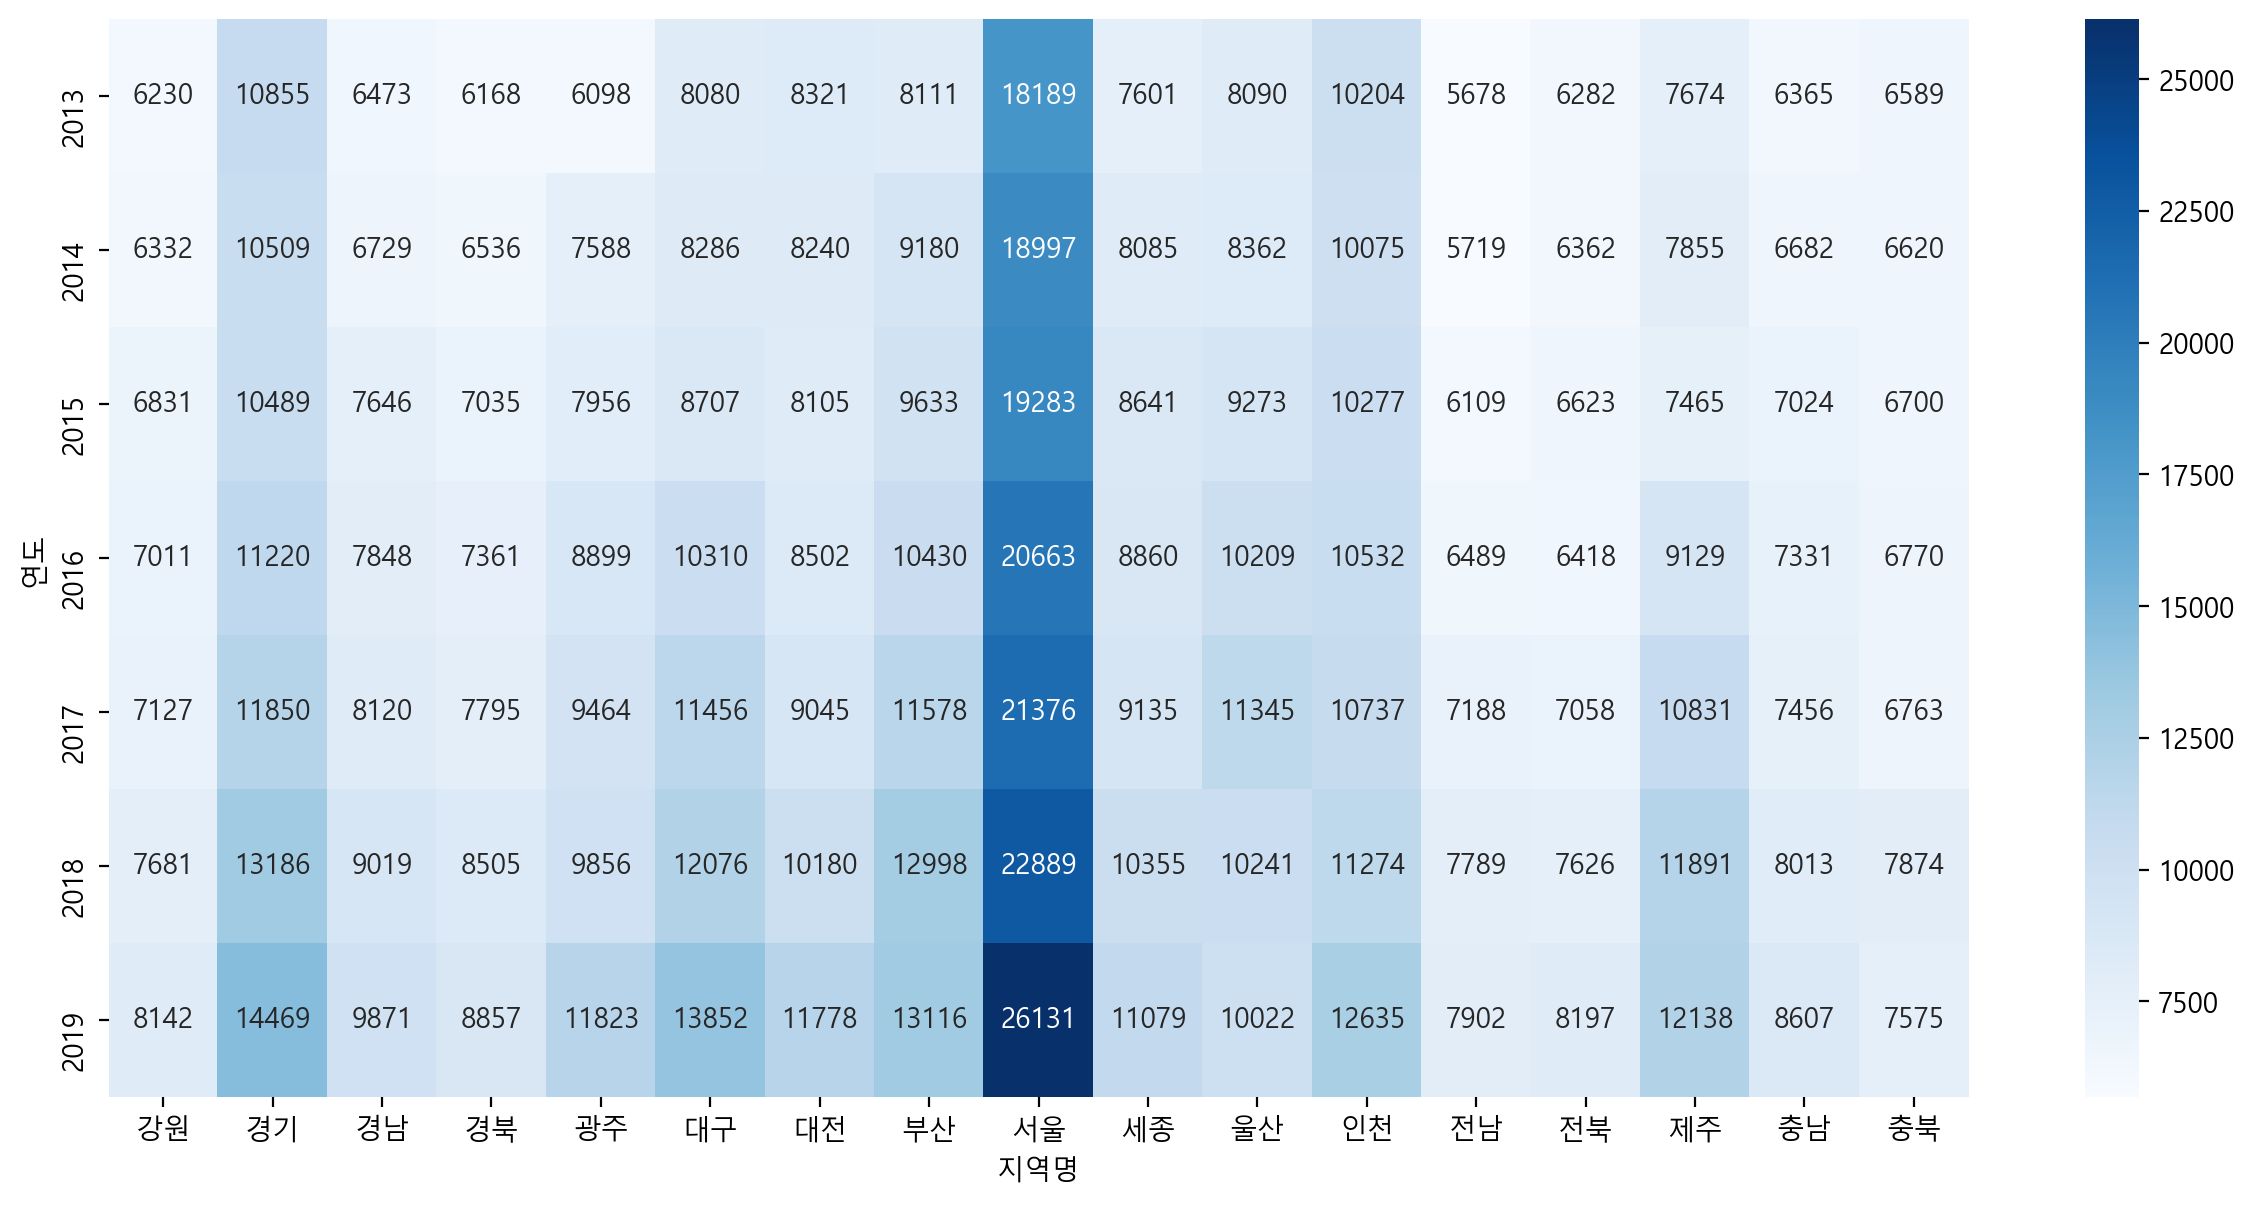

In [69]:
plt.figure(figsize=(15, 7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

<AxesSubplot:xlabel='연도', ylabel='지역명'>

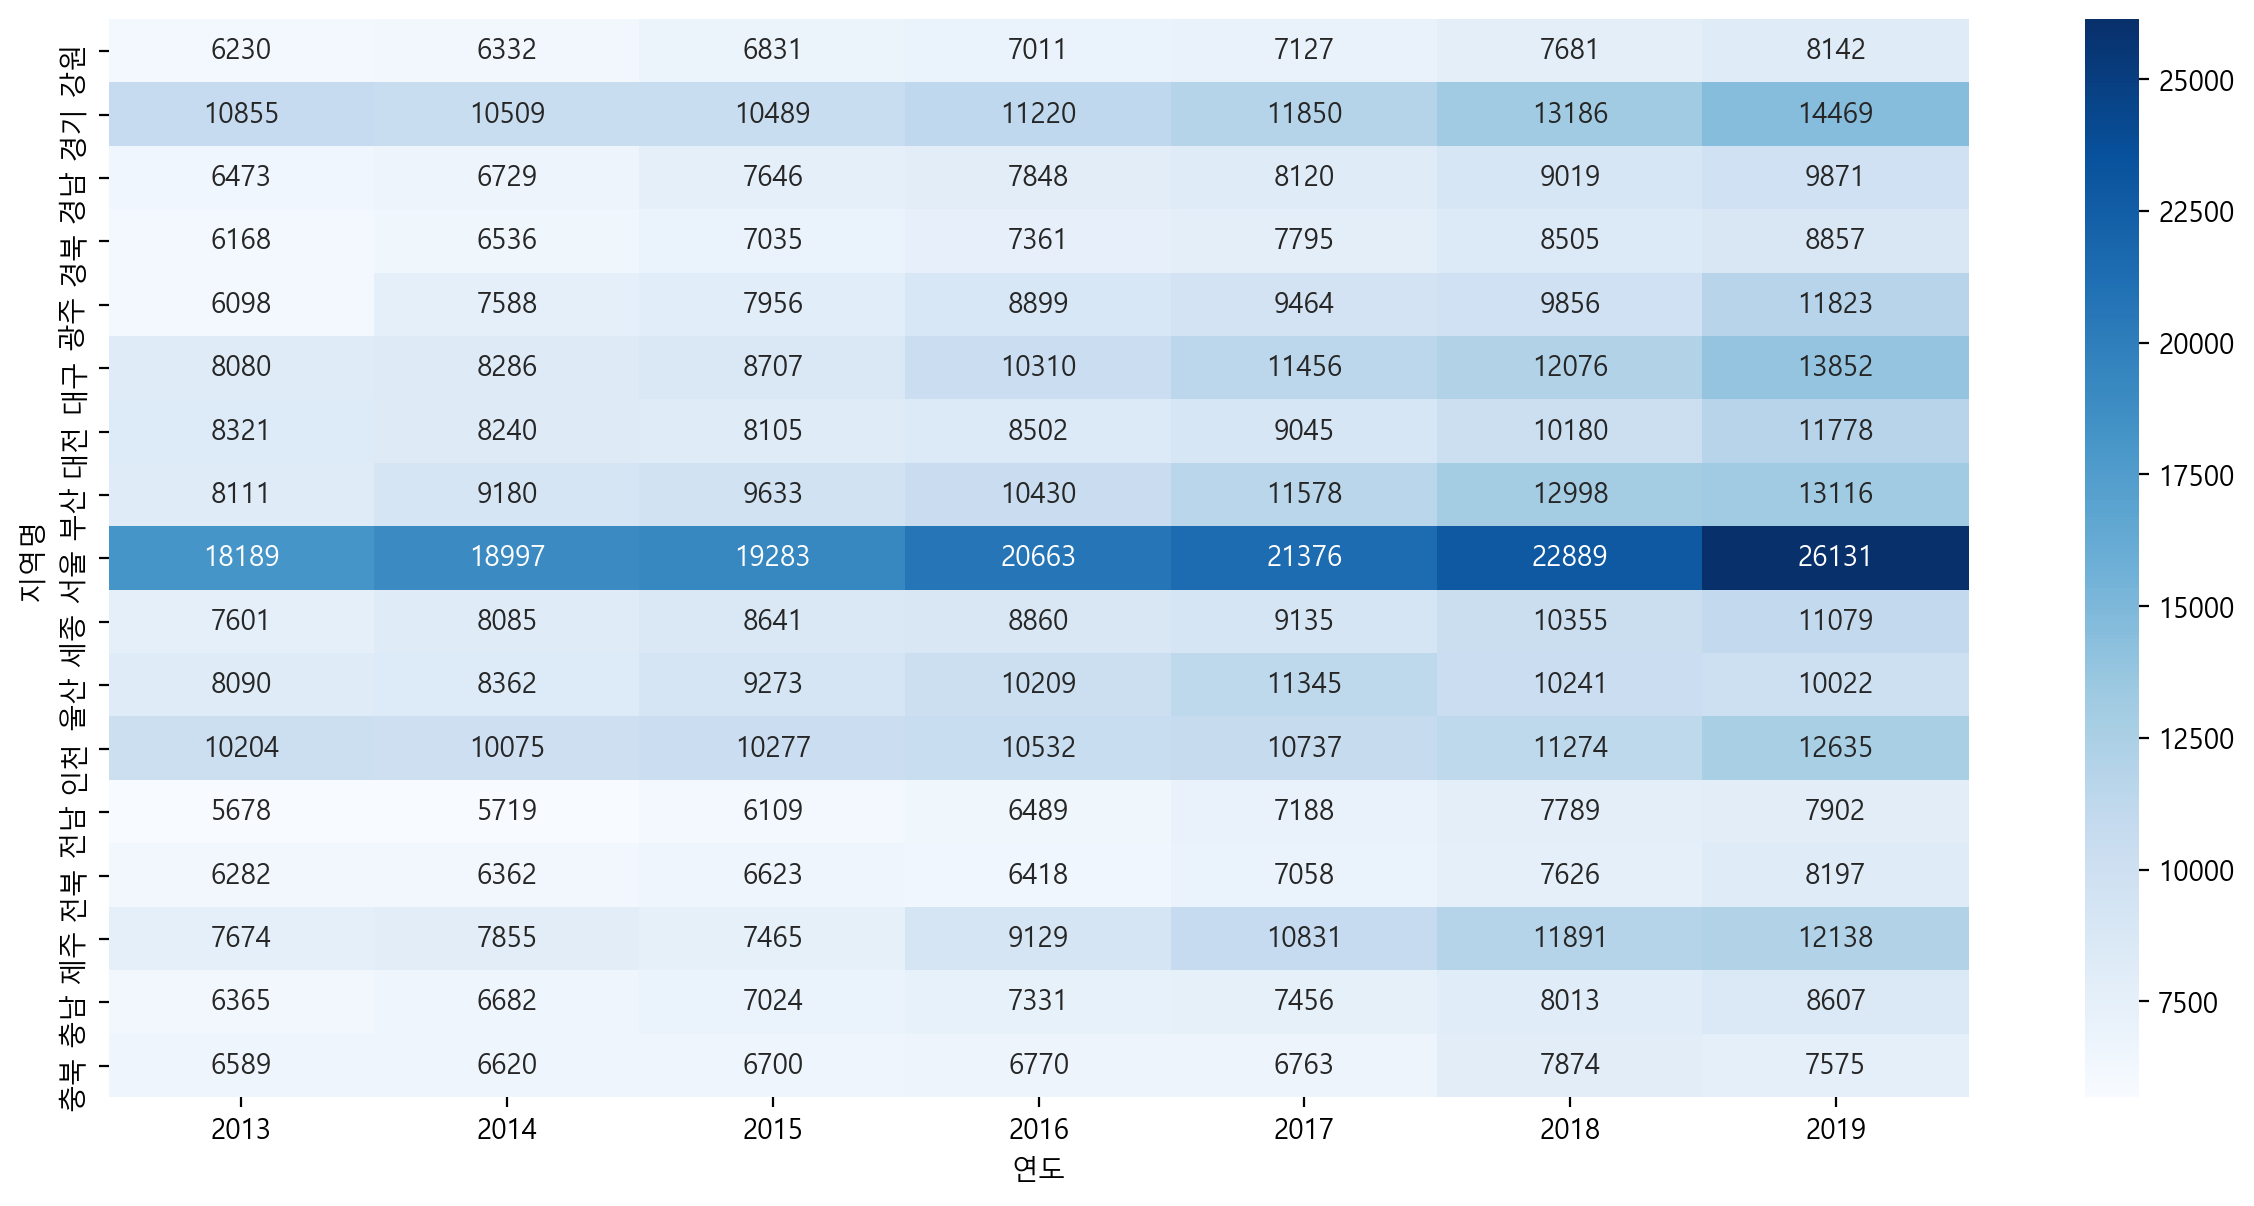

In [70]:
plt.figure(figsize=(15, 7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")

#### Bar

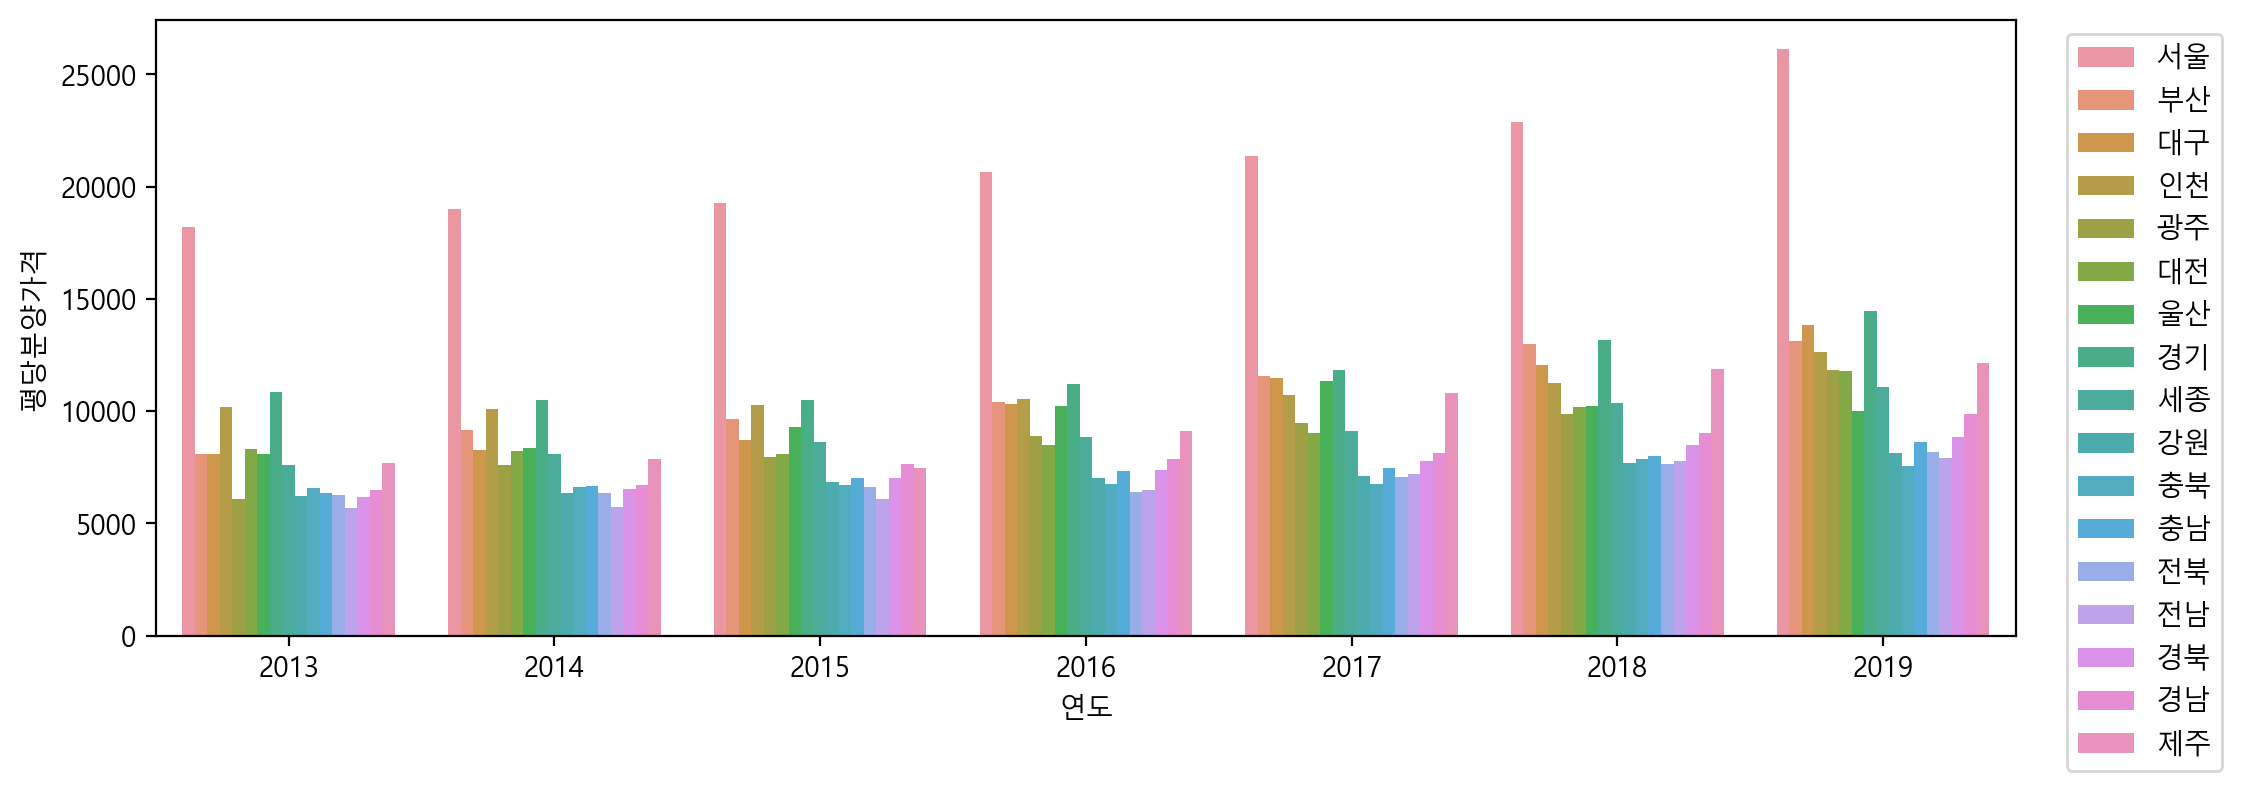

In [72]:
# 연도별, 지역명 별 평당 분양가
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='연도', y='평당분양가격', hue='지역명', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2)

#### Cat Chart

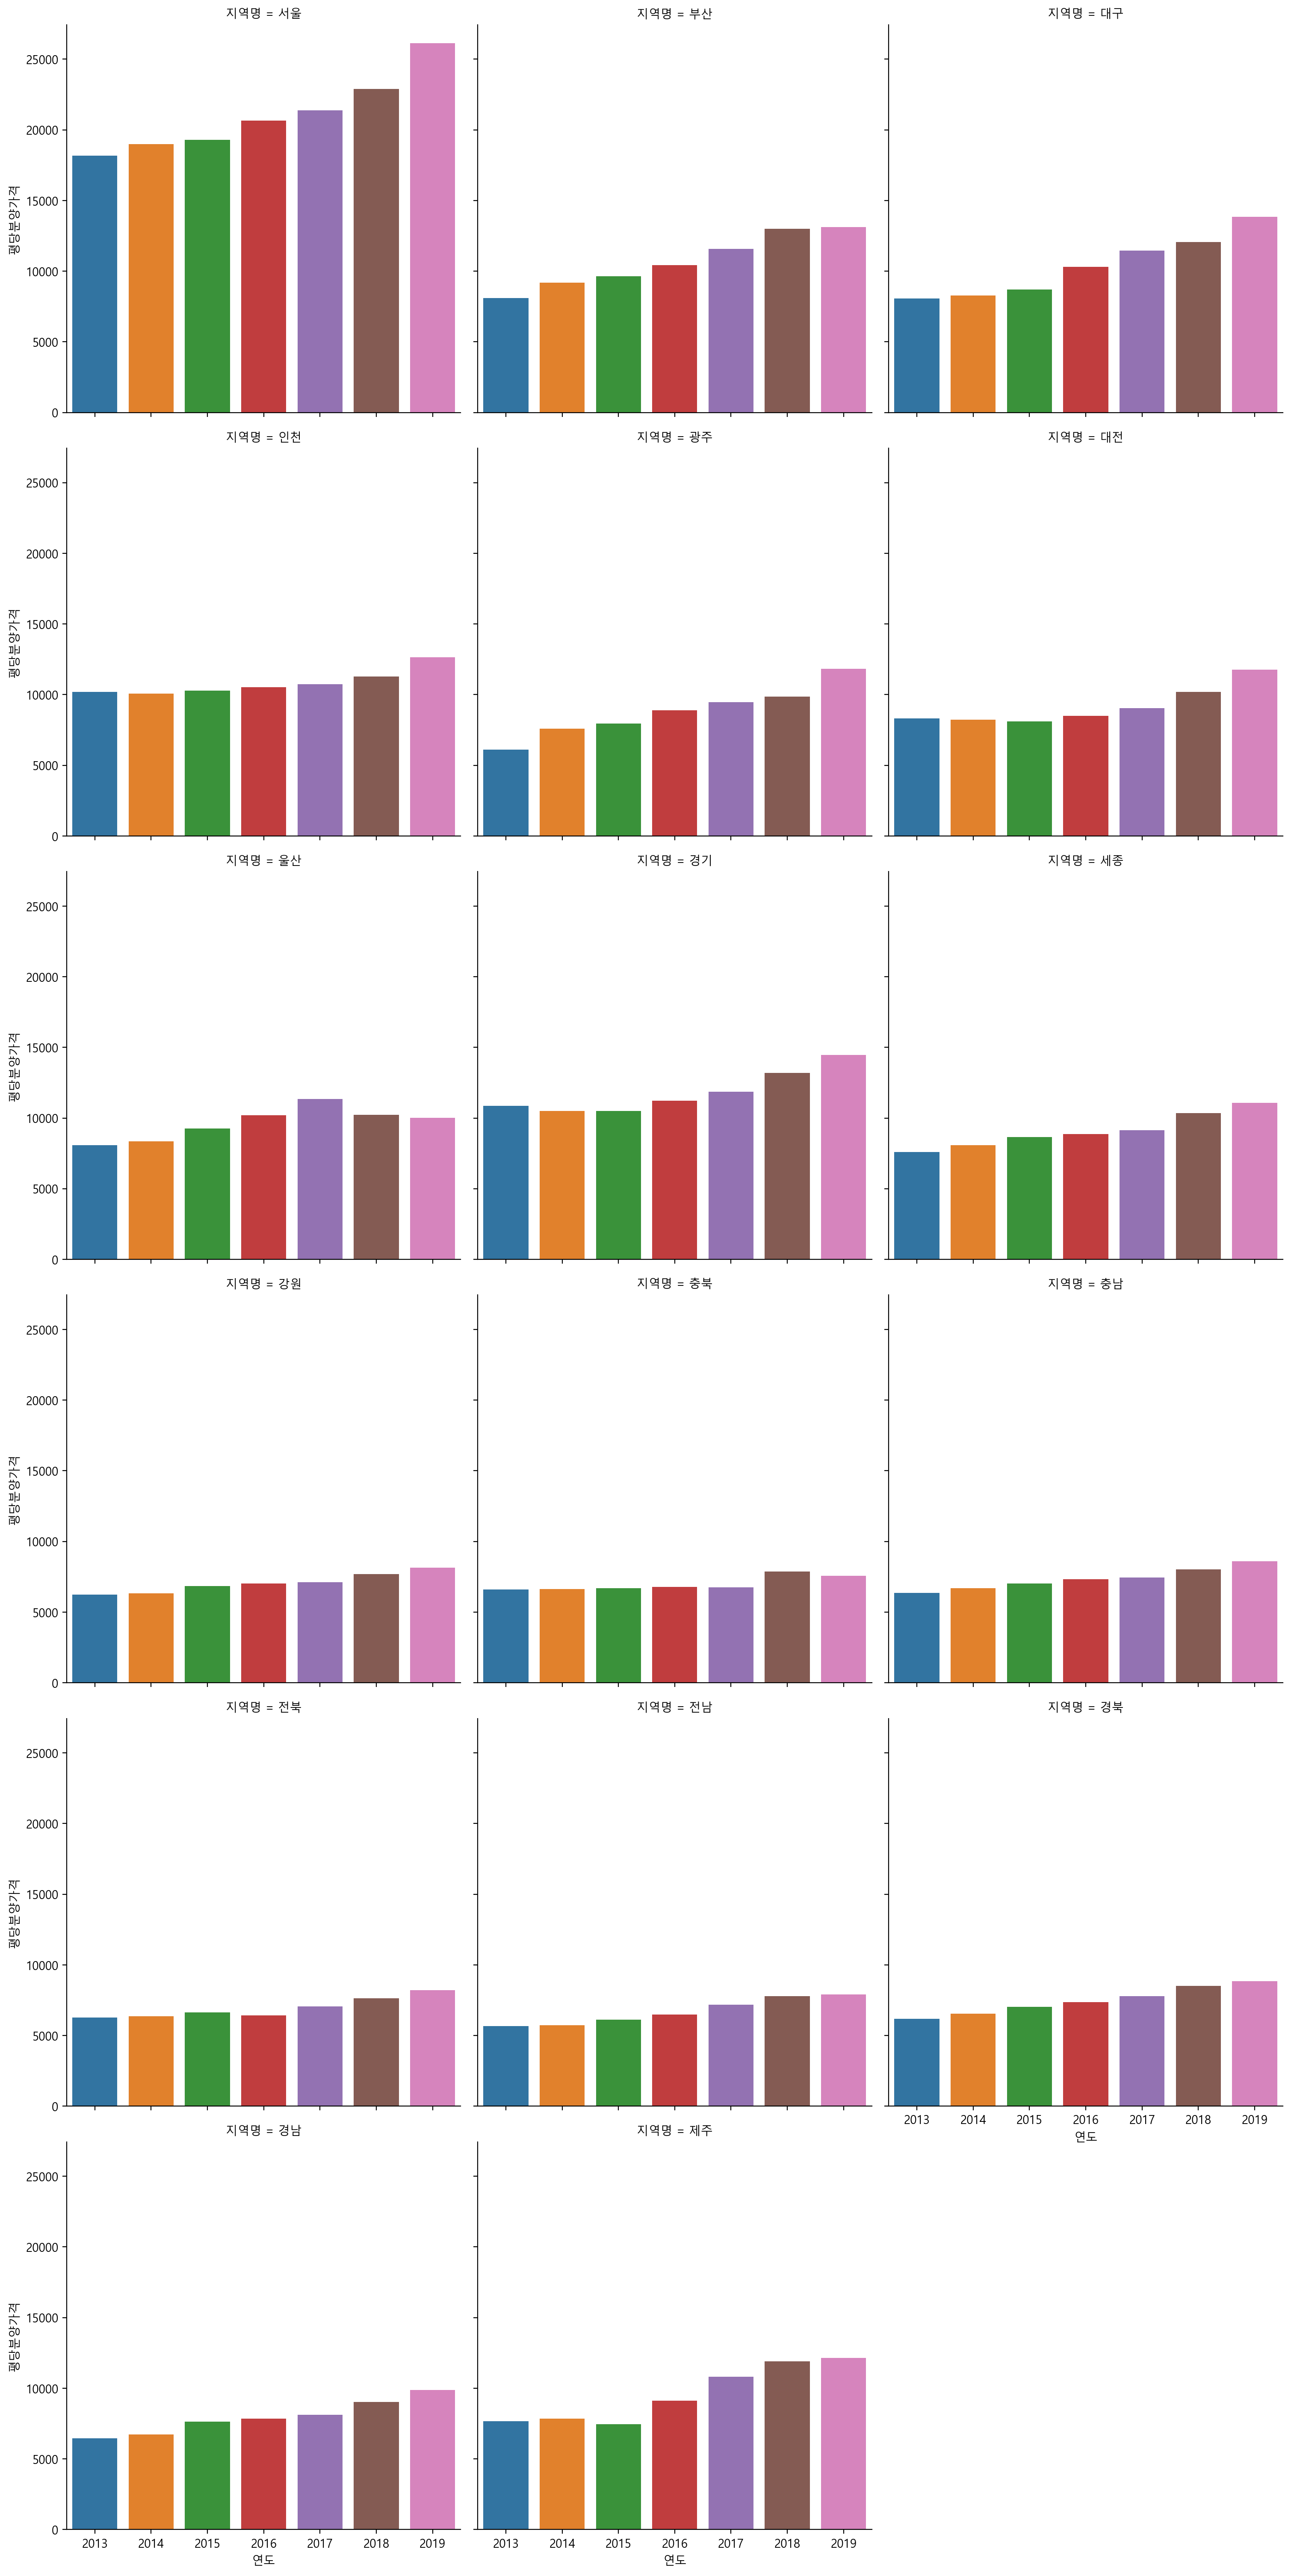

In [74]:
sns.catplot(data=df, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=3, ci=None)